In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import time

df= pd.read_csv('./data/iris.csv')

In [2]:
print(df.shape)
df.head()

(150, 5)


,sepal_legth,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.to_numpy()

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [4]:
from sklearn import preprocessing

x = np.array(df.drop(['class'], 1).astype(float))
x = preprocessing.scale(x)
y = np.array(df['class'])

In [5]:
from KMeans2 import Kmeans

t0 = time.time()
model = Kmeans(n_clusters=3, seed=7, max_iter=20)
model.fit(x)
t1 = time.time()
total_t = t1-t0
print(total_t)
print(model.predict(x))

Iterations run: 0
Iterations run: 1
Iterations run: 2
Iterations run: 3
Iterations run: 4
Iterations complete!
0.0020189285278320312
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0]


In [6]:
from sklearn.cluster import KMeans

t0 = time.time()
model2 = KMeans(n_clusters=3, random_state=7, max_iter=20)
y_model2 = model2.fit_predict(x)
t1 = time.time()
total_t = t1-t0
print(total_t)
print(y_model2)

0.02398824691772461
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Iterations run: 0
Iterations run: 1
Iterations run: 2
Iterations run: 3
Iterations run: 4
Iterations complete!


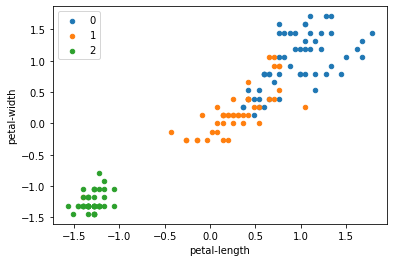

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_clusters(clusters, iterations):
    kmeans = Kmeans(n_clusters=clusters, seed=7, max_iter=iterations)
    kmeans.fit(x)

    df = pd.DataFrame(x,
                      columns=['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width'
                               ]
                     )
    df['label'] = kmeans.predict(x)

    colors = {0:'tab:blue',
            1:'tab:orange', 
            2:'tab:green', 
            3:'tab:red', 
            4:'tab:purple',
            5:'tab:brown',
            6:'tab:pink', 
            7:'tab:gray'
    }
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax,
                   kind='scatter',
                   x='petal-length',
                   y='petal-width',
                   label=key,
                   color=colors[key])
    plt.show()

plot_clusters(3, 20)

Iterations run: 0
Iterations complete!


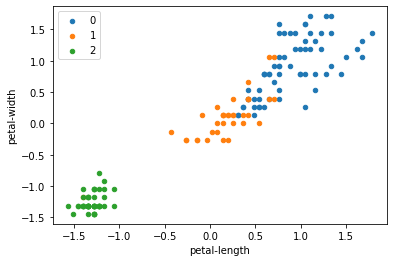

Iterations run: 0
Iterations run: 1
Iterations complete!


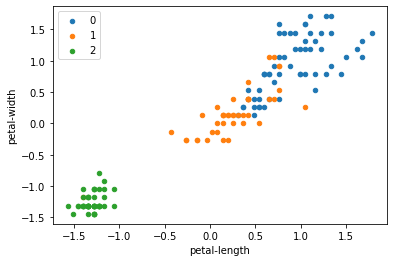

Iterations run: 0
Iterations run: 1
Iterations run: 2
Iterations complete!


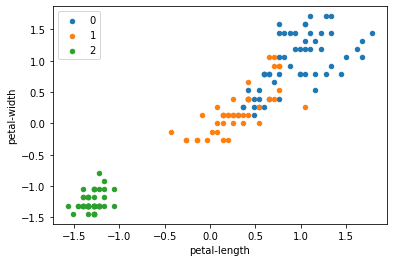

Iterations run: 0
Iterations run: 1
Iterations run: 2
Iterations run: 3
Iterations complete!


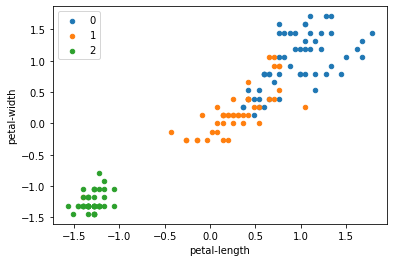

In [8]:
# variations over iteration
%matplotlib inline
plot_clusters(3,1)
plot_clusters(3,2)
plot_clusters(3,3)
plot_clusters(3,4)

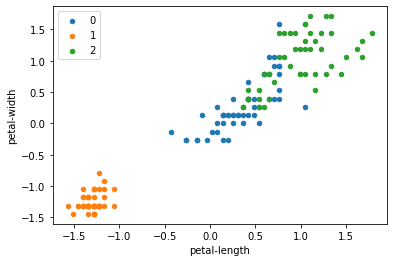

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_clusters(clusters, iterations):
    kmeans = KMeans(n_clusters=clusters, random_state=5, max_iter=iterations)
    kmeans.fit(x)

    df = pd.DataFrame(x,
                      columns=['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width'
                               ]
                     )
    df['label'] = kmeans.predict(x)

    colors = {0:'tab:blue',
            1:'tab:orange', 
            2:'tab:green', 
            3:'tab:red', 
            4:'tab:purple',
            5:'tab:brown',
            6:'tab:pink', 
            7:'tab:gray'
    }
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax,
                   kind='scatter',
                   x='petal-length',
                   y='petal-width',
                   label=key,
                   color=colors[key])
    plt.show()

plot_clusters(3, 20)

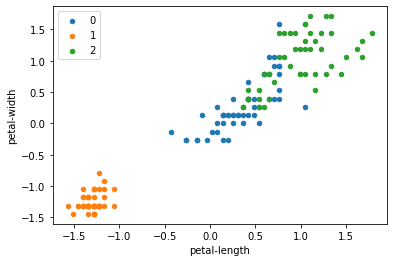

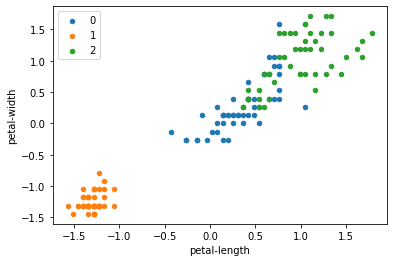

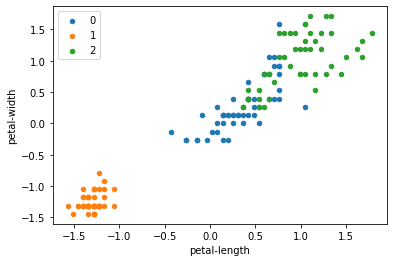

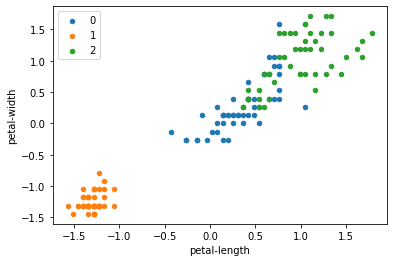

In [49]:
# variations over iteration
%matplotlib inline
plot_clusters(3,1)
plot_clusters(3,2)
plot_clusters(3,3)
plot_clusters(3,4)

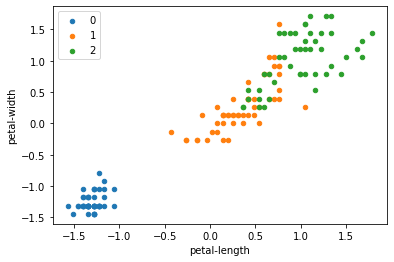

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_clusters(clusters, iterations):
    kmeans = KMeans(n_clusters=clusters, max_iter=iterations)
    kmeans.fit(x)

    df = pd.DataFrame(x,
                      columns=['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width'
                               ]
                     )
    df['label'] = kmeans.predict(x)

    colors = {0:'tab:blue',
            1:'tab:orange', 
            2:'tab:green', 
            3:'tab:red', 
            4:'tab:purple',
            5:'tab:brown',
            6:'tab:pink', 
            7:'tab:gray'
    }
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax,
                   kind='scatter',
                   x='petal-length',
                   y='petal-width',
                   label=key,
                   color=colors[key])
    plt.show()

plot_clusters(3, 200)

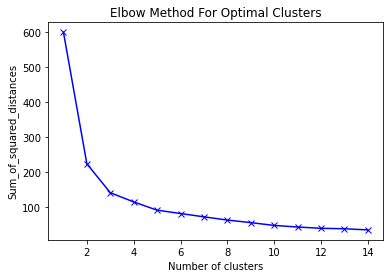

In [12]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    #km = km.fit(points)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal Clusters')
plt.show()

array([-2.30970265,  5.8496944 ])

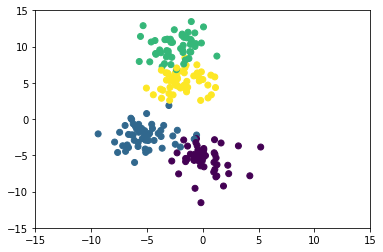

In [44]:
from sklearn.datasets import make_blobs
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

X = data[0]
X[2]

In [45]:
temp_k  = Kmeans(4, 1, 600)
temp_fitted  = temp_k.fit(X)
new_data = np.array([[1.066, -8.66],
                    [1.87876, -6.516],
                    [-1.59728965,  8.45369045],
                    [1.87876, -6.516]])
temp_fitted.predict(new_data)

Iterations run: 0
Iterations run: 1
Iterations complete!


array([2, 2, 1, 2], dtype=int64)